# Analysis of Titanic Dataset

## Project overview

You will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. This project is open-ended in that we are not looking for one right answer.

Dataset description can be found at [this Kaggle site](https://www.kaggle.com/c/titanic/data)

Before exploring the dataset, here are some questions I'm hoping this data will help me answer (including but not limited to):

*A more general one*:

1. How did various factors influence the passengers' chances of survival?

*More specific ones*:

1. Who's more numerous aboard the Titanic, men or women?
2. How were men and women distributed across passenger classes?
3. How many survivors were there among men and women belonging to different passenger classes?
4. What's the age distribution of the passengers?  
5. Were people travelling alone more likely to survive than those having family members aboard the ship?
6. Where did most people embark the Titanic?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [242]:
# library versions I'm using
print 'pandas version is {}'.format(pd.__version__)
print 'numpy version is {}'.format(np.__version__)
print 'matplotlib version is {}'.format(matplotlib.__version__)
print 'seaborn version is {}'.format(sns.__version__)

pandas version is 0.19.1
numpy version is 1.11.2
matplotlib version is 1.5.1
seaborn version is 0.7.1


In [2]:
titanic = pd.read_csv('../data/titanic-data.csv', index_col='PassengerId') # since PassengerId corresponds to the number of 
# a row in the dataset, it makes sense to index the resulting dataframe by this column

In [3]:
# first, let's get the general idea of what we're dealing with
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Copying the dataset description from Kaggle as a convenient reference:

#### VARIABLE DESCRIPTIONS:

survived - Survival (0 = No; 1 = Yes)
                
pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES): 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Data Wrangling

We can see from the table slice above that some column names are not descriptive enough. It might be a good idea to rename a few columns to simplify plotting and make more expressive and easily readable charts.

In [141]:
# renaming several columns that we'll be using quite often in our analysis
titanic = titanic.rename(index=str, columns={'Pclass': 'Class', 'Survived': 'Survival', 'Embarked': 'Port'})

In [142]:
# checking the renaming worked as expected
titanic.head()

,Survival,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looks better now! The next step to improving our visualizations would be to give the categorical variables more readily understandable names, which will save time when interpreting the charts we make in the process.

In [143]:
# renaming the variables in the Survival column
titanic['Survival'] = titanic.Survival.map({0: 'died', 1: 'survived'})

In [144]:
# renaming the variables in the CLass column
titanic['Class'] = titanic.Class.map({1: 'first class', 2: 'second class', 3: 'third class'})

In [145]:
# renaming the variables in the Port column
titanic['Port'] = titanic.Port.map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [146]:
# checking the result
titanic.head()

,Survival,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port
PassengerId,,,,,,,,,,,
1,died,third class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,survived,first class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,survived,third class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,survived,first class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,died,third class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Now that the names are more interpretable, we can begin our analysis.

## High-Level Analysis

In [147]:
# from the table above, it's evident there are some missing (NaN) values; let's see how many entries in each column are non-null
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survival    891 non-null object
Class       891 non-null object
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Port        889 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 83.5+ KB


In [148]:
# some descriptive statistics of the dataset
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


A few values jump out right at you - let's scratch the surface a bit.

In [149]:
# looks like there was a large family travelling aboard the ship
titanic[titanic.SibSp == 8]

,Survival,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port
PassengerId,,,,,,,,,,,
160,died,third class,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,Southampton
181,died,third class,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,Southampton
202,died,third class,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,Southampton
325,died,third class,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,Southampton
793,died,third class,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,Southampton
847,died,third class,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,Southampton
864,died,third class,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,Southampton


Sadly, none of them survived.

In [150]:
# that's some huge fare!
titanic[titanic.Fare == 512.3292]

,Survival,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port
PassengerId,,,,,,,,,,,
259,survived,first class,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,Cherbourg
680,survived,first class,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,Cherbourg
738,survived,first class,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,Cherbourg


Judging from history websites like [this](https://www.encyclopedia-titanica.org/cabins.html), it was probably a wealthy couple (Mr and Mrs Cardeza) accompanied by a maid and a manservant.

In [151]:
# function for plotting data, primarily using built-in pandas bar plots
def plot_data(data, title, label, kind='bar', rot='horizontal', stacked=False):
    data.plot(kind=kind, rot=rot, title=title, stacked=stacked).set_xlabel(label)

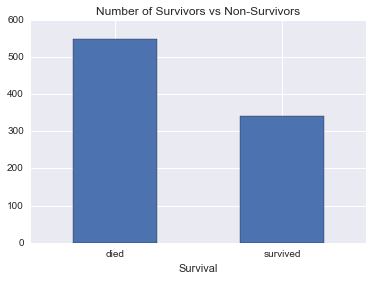

In [152]:
# taking a quick look at the number of survivors and non-survivors
plot_data(titanic.Survival.value_counts(), 'Number of Survivors vs Non-Survivors', 'Survival')

In [153]:
# exact numbers
survival = titanic.Survival.value_counts()
print 'Number of survivors is {}'.format(survival.loc['survived'])
print 'Number of non-survivors is {}'.format(survival.loc['died'])

Number of survivors is 342
Number of non-survivors is 549


### Dataset Limitations

From the quick superficial analysis performed above, there arise a few limitations that we'll have to keep in mind from here on out:

1. This dataset contains data about only a third of all the Titanic passengers (891 out of 2224), so the whole picture might be quite different from our findings. That said, since we're not using any statistical tests in this analysis to back up our assumptions, we can make only tentative statements about the population parameters.
2. The dataset contains some missing values (ages of certain passengers, data about the cabin a passenger occupied during the voyage). We could use machine learning techniques to try and impute these values with a certain margin of error, but this is outside the scope of this analysis, which means we'll have to just ignore this data. To some extent, it will undermine the forcefulness of the arguments we'll be using and make our assumptions even less certain and prone to error.
3. Data description states a number of person-to-person relations (such as close friends, niece/nephew, uncle/aunt) have been excluded from the dataset. While this reduces the overall complexity of the data, it does ignore some important ties between the variables, which would have helped us perform a more sophisticated analysis and, possibly, glean new insights otherwise overlooked.

## Gender Analysis

In [154]:
# function for drawing pie charts
def pie_chart(data, explode, colors, title):
    plt.pie(x=data.values, labels=data.index, autopct='%1.1f%%', shadow=True,
            startangle=90, explode=explode, colors=colors)
    plt.title(title)

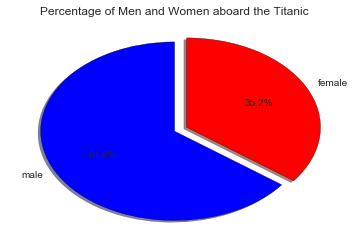

In [155]:
# so what's the percentage of men and women among the passengers? 
pie_chart(titanic.Sex.value_counts(), [0, .1], ['b', 'r'], 'Percentage of Men and Women aboard the Titanic')

Percentwise, men seem to be almost twice as numerous as women. How about the exact numbers?

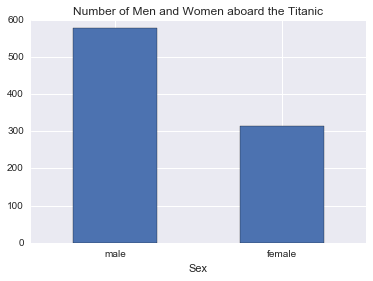

In [156]:
# creating a simple bar chart to visually compare the headcount for men and women
plot_data(titanic.Sex.value_counts(), 'Number of Men and Women aboard the Titanic', 'Sex')

In [157]:
# getting the exact figures
passengers = titanic.Sex.value_counts().values
print 'Number of men aboard the ship is {}'.format(passengers[0])
print 'Number of women aboard the ship is {}'.format(passengers[1])

Number of men aboard the ship is 577
Number of women aboard the ship is 314


Now that we've seen the big picture, it's time to dive deeper and work with some more granular data. Let's stick with the passengers' gender and explore how many men and women travelled in each class.

In [158]:
# function for grouping data by various parameters
def group_data(data, group_by_col, column):
    return data.groupby(group_by_col)[column].value_counts().unstack()

In [159]:
# grouping passengers by class and counting men and women separately for each
gender_by_class = group_data(titanic, 'Class', 'Sex')
gender_by_class

Sex,female,male
Class,,
first class,94,122
second class,76,108
third class,144,347


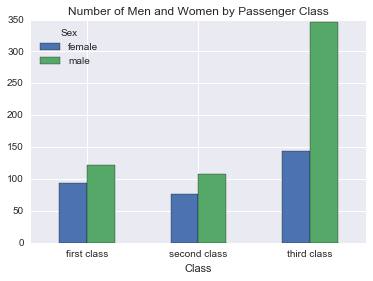

In [160]:
# let's compare the resulting headcounts visually side by side using a bar chart
plot_data(gender_by_class, 'Number of Men and Women by Passenger Class', 'Class')

That's interesting: genders are more or less well-balanced in the first two classes, whereas there are pronouncedly more men (namely, by a factor of 2.4) in the least expensive third class.

In [161]:
# creating a table that shows the number of survivors by gender and passenger class
survivors_by_class = group_data(titanic, ['Class', 'Sex'], 'Survival').unstack().survived
survivors_by_class

Sex,female,male
Class,,
first class,91,45
second class,70,17
third class,72,47


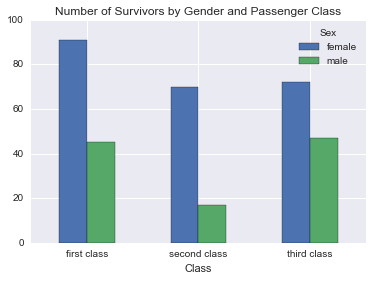

In [162]:
# creating a bar chart similar to the one above to see how the number of male and female survivors differs by passenger class
plot_data(survivors_by_class, 'Number of Survivors by Gender and Passenger Class', 'Class')

Obviously, more women were saved in each class, which might be due to the well-known code of conduct - **women and children first**. 

Speaking of children, it may be a good idea to introduce more granularity into the data by labelling anybody under 18 (age when a person is typically considered an adult in Western countries) a child and re-drawing the plots above to see what changes and what new insights can be obtained from it. For the purposes of this analysis, I'll create a separate column called **Person** and re-classify each passenger as **male**, **female**, or **child** (regardless of their gender).

In [163]:
titanic['Person'] = titanic[['Age', 'Sex']].apply(lambda passenger: 'child' if passenger[0] < 18 else passenger[1], axis=1)
# passenger[0] is a person's age, passenger[1] - their gender; axis = 1 since the function is applied to each row

In [164]:
# quick visual check to see if the new column has been created and values assigned properly
titanic.head(10)

,Survival,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port,Person
PassengerId,,,,,,,,,,,,
1,died,third class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male
2,survived,first class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female
3,survived,third class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
4,survived,first class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female
5,died,third class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male
6,died,third class,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown,male
7,died,first class,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,Southampton,male
8,died,third class,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,Southampton,child
9,survived,third class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,Southampton,female


In [165]:
# value counts for the three classes
person_type = titanic.Person.value_counts()
print 'Number of men aboard the ship is {}'.format(person_type.loc['male'])
print 'Number of women aboard the ship is {}'.format(person_type.loc['female'])
print 'Number of children aboard the ship is {}'.format(person_type.loc['child'])

Number of men aboard the ship is 519
Number of women aboard the ship is 259
Number of children aboard the ship is 113


Now, let's take a look at the same plots, with children added to them.

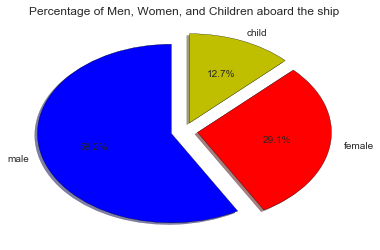

In [166]:
# percentage of men, women, and children among the passengers
pie_chart(titanic.Person.value_counts(), [.1, .1, .1], ['b', 'r', 'y'], 'Percentage of Men, Women, and Children aboard the ship')

We can clearly see children account for slightly over 10% of all the passengers.

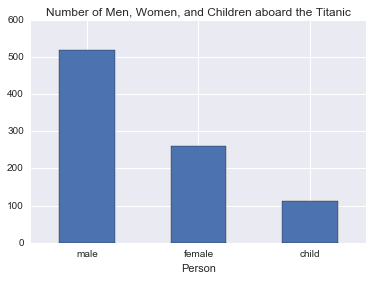

In [167]:
# visually comparing the headcount for men, women, and children
plot_data(titanic.Person.value_counts(), 'Number of Men, Women, and Children aboard the Titanic', 'Person')

In [168]:
# grouping passengers by class and counting men, women, and children separately for each
person_by_class = group_data(titanic, 'Class', 'Person')
person_by_class

Person,child,female,male
Class,,,
first class,12,86,118
second class,23,64,97
third class,78,109,304


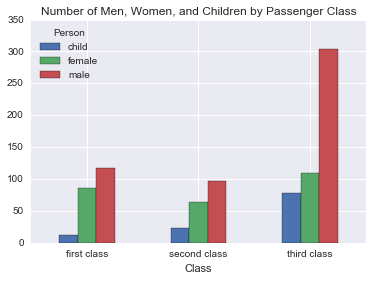

In [169]:
# visual side-by-side comparison of distribution of men, women, and children across the three passenger classes
plot_data(person_by_class, 'Number of Men, Women, and Children by Passenger Class', 'Class')

Once again, the third passenger class has twice as many children as the first two classes combined (78 vs 35).

In [170]:
# creating a table that shows the number of survivors by person type and passenger class
survivors_by_class_c = group_data(titanic, ['Class', 'Person'], 'Survival').unstack().survived
survivors_by_class_c

Person,child,female,male
Class,,,
first class,11,84,41
second class,21,58,8
third class,29,53,37


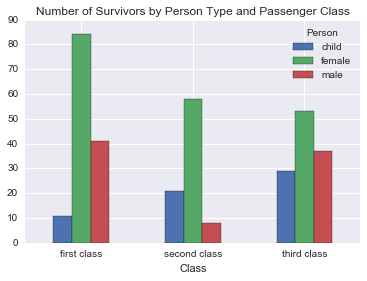

In [171]:
# creating a bar chart similar to the one above to see how the number of survivors among men, women, and children
# differs by passenger class
plot_data(survivors_by_class_c, 'Number of Survivors by Person Type and Passenger Class', 'Class')

Almost all the children from the first two classes were saved, while only roughly a third survived in the third class (29 out of 78). Which brings us to the question of the total survival rates for men, women, and children.

In [172]:
# table showing the total number of the dead and alive among men, women, and children
dead_alive = group_data(titanic, 'Person', 'Survival')
dead_alive

Survival,died,survived
Person,,
child,52,61
female,64,195
male,433,86


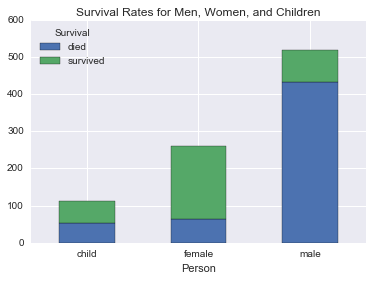

In [173]:
# using a stacked bar plot showing survival rates for each person type (male, female, child)
plot_data(dead_alive, 'Survival Rates for Men, Women, and Children', 'Person', stacked=True)

This chart shows the survival rate among men is much lower than among women or children (17% vs 75% and 54%, respectively), which seems to be in line with the assumption we made earlier about the **women and children first** principle.

## Age Analysis

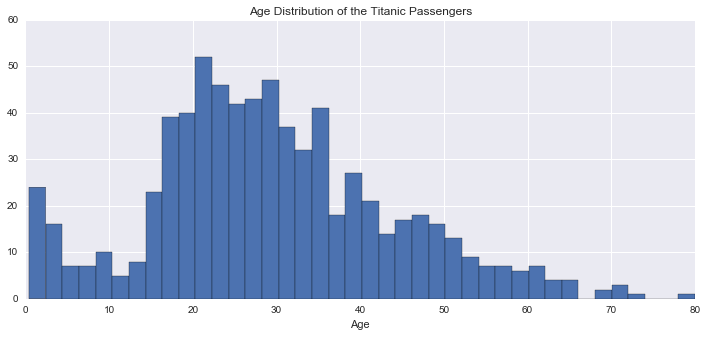

In [174]:
# building a histogram of the passengers' ages
titanic.Age.hist(bins=40, figsize=(12, 5))
plt.xlabel('Age')
plt.title('Age Distribution of the Titanic Passengers')

Generally, most passengers were young people aged between 20 and 35. But what if we wanted to know age distributions separately for men, women, and children? Let's create a simple function that'll help us visualize that.

In [126]:
# function that shows age distribution for each person type using a KDE plot
def plot_age_dist(person, axes):
    sns.kdeplot(titanic[titanic.Person == person].Age, ax=axes, label=person)
    plt.xlim(0, titanic[titanic.Person == person].Age.max()) # limiting each plot by the max age for the respective person type
    plt.xlabel('Age')
    axes.set_title('Age Distribution for {}'.format('Women' if person == 'female' else 'Men' if person == 'male' else 'Children'))
    plt.tight_layout()

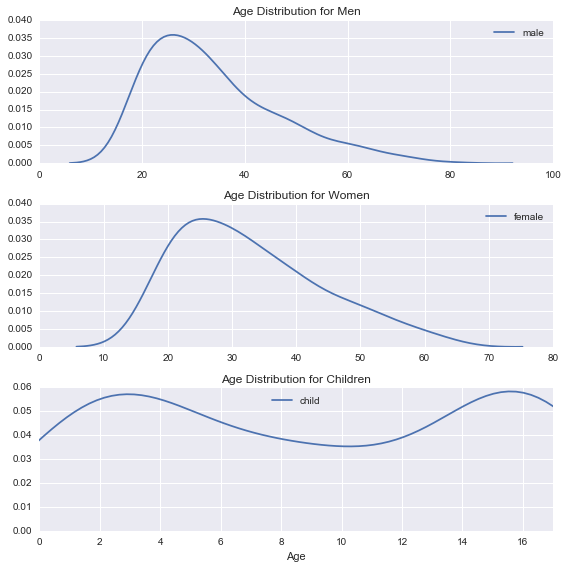

In [127]:
# plotting age distributions for men, women, and children
f, axesarr = plt.subplots(len(titanic.Person.unique()), figsize=(8, 8))
for person, axes in zip(titanic.Person.unique(), axesarr):
    plot_age_dist(person, axes)

Turns out seaborn offers a fancier way to achieve the same goal - FacetGrid to the rescue! It's possible to display all the distributions together, each color-coded using the *hue* argument.

In [175]:
# function that draw multiple KDE plots in one figure
def mult_kde_plots(df, hue, title, parm='Age', aspect=4.5):
    sns.FacetGrid(df, hue=hue, aspect=aspect).map(sns.kdeplot, parm,
                                                      shade=True).set(xlim=(0, df[parm].max()), title=title).add_legend()

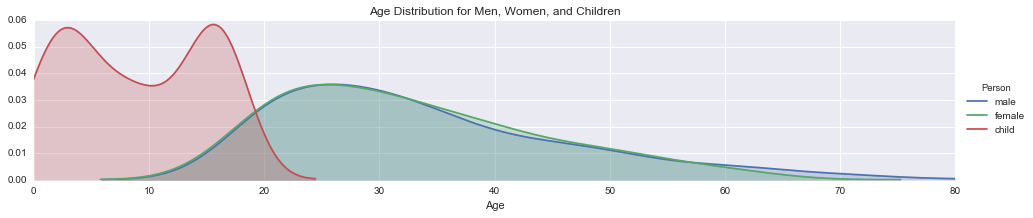

In [176]:
# age distribution by person type
mult_kde_plots(titanic, 'Person', 'Age Distribution for Men, Women, and Children')

The plot tells us the age distribution among men and women is unimodal, with the mode at around 25, whereas in the case of children it's a bimodal distribution, with two pronounced spikes at about 3 and 15.5.

We could use the same FacetGrid as above and change *hue* to see age distribution by various parameters, such as passenger class or survival. Let's do just that.

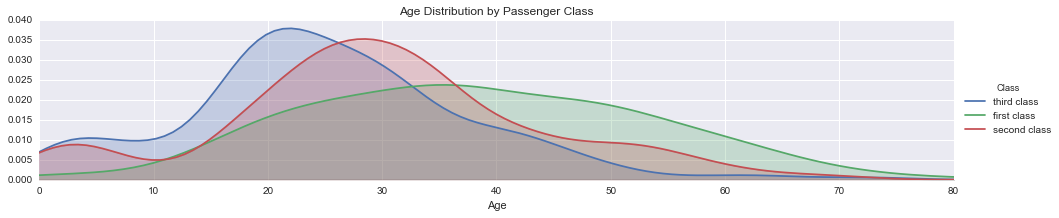

In [177]:
# age distribution by passenger class
mult_kde_plots(titanic, 'Class', 'Age Distribution by Passenger Class')

Looks like younger passengers tend to prefer cheaper classes! Come to think of it, it does make sense and is probably partly due to the fact that wealthier people who can afford a higher fare tend to be older and have some work experience under their belts.

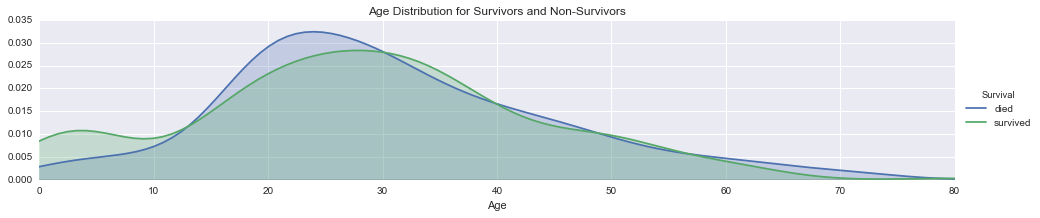

In [178]:
# age distribution for survivors and non-survivors
mult_kde_plots(titanic, 'Survival', 'Age Distribution for Survivors and Non-Survivors')

On the whole, most survivors seem to be a bit older than non-survivors. To some extent, it might have to do with what we've discovered above: older people being more likely to be first-class passengers. I believe it'd be fair to assume being in the first class entailed some benefits, like special treatment in case of a disaster. Let's try to back up this assumption and explore survival rates for each passenger class.

## Passenger Class Analysis

In [179]:
# function for making seaborn factor plots
def factor_plot(x, y, data, title, hue=None):
    sns.factorplot(x, y, hue=hue, data=data.applymap(lambda ent: 1 if ent == 'survived' else 0 if ent == 'died' else ent)\
                   .sort_values(by=x))
    plt.title(title)

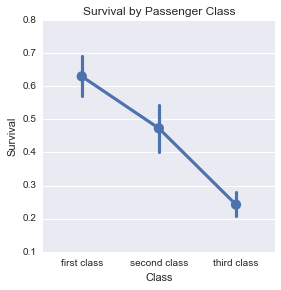

In [180]:
# survival by passenger class
factor_plot('Class', 'Survival', titanic, 'Survival by Passenger Class')

Chances of survival seem to decrease with the passenger class.

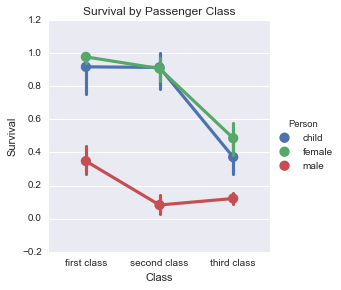

In [181]:
# to break it down a bit further, let's throw the person type into the mix using the hue argument
factor_plot('Class', 'Survival', titanic, 'Survival by Passenger Class', hue='Person')

The general decreasing trend seems to still be in place, with a notable exception of male adult survivors in the third passenger class, where more men survived than in the second class (but still fewer than in the first) - tentatively, this effect may be ascribed to a much higher number of men in the third class as compared to the other two classes (as seen above in the Gender Analysis section).

In [182]:
# creating a stacked bar plot showing survival rates by passenger class
survival_by_pclass = group_data(titanic, 'Class', 'Survival')
survival_by_pclass

Survival,died,survived
Class,,
first class,80,136
second class,97,87
third class,372,119


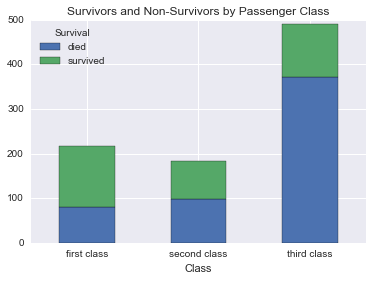

In [183]:
# creating a stacked bar plot showing survival rates by passenger class
plot_data(survival_by_pclass, 'Survivors and Non-Survivors by Passenger Class', 'Class', stacked=True)

Indeed, the first class is the only one with the overall survival rate of over 50%. However, in the **Gender Analysis** section, we found out that almost a half of the first-class passengers were women, so to be fair, let's compare survival rates by passenger class separately for men and women.

In [184]:
# male survivors and non-survivors by passenger class
group_data(titanic[titanic.Sex == 'male'], 'Class', 'Survival')

Survival,died,survived
Class,,
first class,77,45
second class,91,17
third class,300,47


In [185]:
# female survivors and non-survivors by passenger class
group_data(titanic[titanic.Sex == 'female'], 'Class', 'Survival')

Survival,died,survived
Class,,
first class,3,91
second class,6,70
third class,72,72


The picture's getting clearer now. Almost all the women were saved in each passenger class, but the first class is again the only one where over 50% of male passengers survived, with much lower survival rates in the second and third classes (16% and 14%, respectively), which seems to corroborate the assumption of preferential treatment given to the first-class passengers. It's worth noting, however, that this special treatment is, of course, not the only factor that influenced a person's chance of survival, but it did play a certain role. Later on, we'll explore what other things helped people escape death. For now, let's take a look at a few other statistics about the passengers: where they came from, or what deck they were mainly living on.

## Port of Embarkation Analysis

In [186]:
# creating a table that shows distribution of passenger classes by port of embarkation
passengers_by_port = group_data(titanic, 'Port', 'Class')
passengers_by_port

Class,first class,second class,third class
Port,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


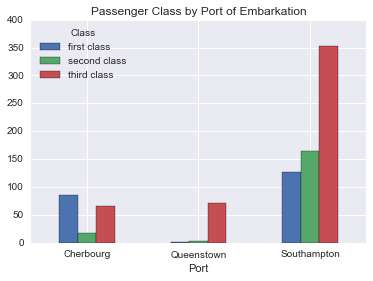

In [187]:
# distribution of passengers across classes by port of embarkation
plot_data(passengers_by_port, 'Passenger Class by Port of Embarkation', 'Port')

What's curious is most third-class passengers got aboard in Queenstown and Southampton, and Southampton (which is the port of departure) accounted for most passengers overall. Percentwise, embarkations are distributed as follows:

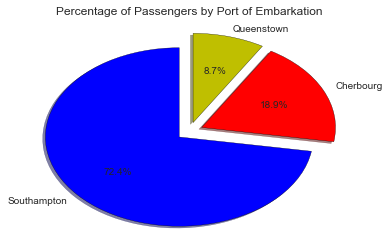

In [188]:
# pie chart showing how many people got aboard in each port
pie_chart(titanic.Port.value_counts(), [.1, .1, .1], ['b', 'r', 'y'], 'Percentage of Passengers by Port of Embarkation')

In [189]:
# creating a table that shows distribution of gender by port of embarkation
gender_by_port = group_data(titanic, 'Port', 'Sex')
gender_by_port

Sex,female,male
Port,,
Cherbourg,73,95
Queenstown,36,41
Southampton,203,441


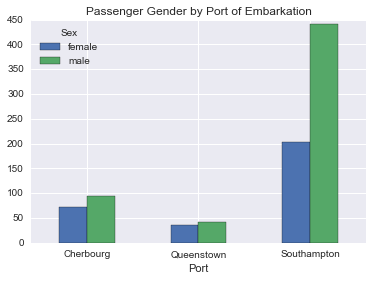

In [190]:
# passengers' gender by port of embarkation
plot_data(gender_by_port, 'Passenger Gender by Port of Embarkation', 'Port')

Here, we can see twice as many men got aboard the ship in the port of Southampton, whereas the number of men and women is more or less equal for the other two ports.

## Deck Analysis

Looking at the **Cabin** column, one can notice that, where applicable, the cabin number is prefixed with a letter that denotes a deck this passenger was residing on. Exploring this further might yield some new insights about the passengers.

In [191]:
titanic.Cabin.count()

204

The cabin data is available only for 204 entries, so we can drop null values as they won't be of any help.

In [192]:
decks = titanic.Cabin.dropna().apply(lambda cabin_num: cabin_num[0]) # cabin_num[0] is the deck letter

In [193]:
# checking the transformation worked
decks.head()

PassengerId
2     C
4     C
7     E
11    G
12    C
Name: Cabin, dtype: object

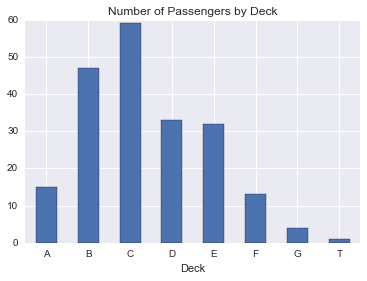

In [194]:
# bar chart showing the number of passengers by deck (where applicable)
plot_data(decks.value_counts().sort_index(), 'Number of Passengers by Deck', 'Deck')

What jumps right out at you is the letter **T** - seems like this cabin was occupied by just one person. Let's see who that was.

In [195]:
decks[decks.values == 'T'].index

Index([u'340'], dtype='object', name=u'PassengerId')

In [199]:
titanic.loc['340']

Survival                            died
Class                        first class
Name        Blackwell, Mr. Stephen Weart
Sex                                 male
Age                                   45
SibSp                                  0
Parch                                  0
Ticket                            113784
Fare                                35.5
Cabin                                  T
Port                         Southampton
Person                              male
Name: 340, dtype: object

[This](https://www.encyclopedia-titanica.org/cabins.html) site claims it's the Boat Deck (so named because lifeboats were stored there) with 6 cabins capable of accommodating up to 7 people, but 'there is no evidence that anyone else occupied a Boat Deck cabin.'

In [200]:
titanic = pd.concat([titanic, decks.rename('Deck')], axis=1) # concatenating the decks series with the titanic dataframe
# for further analysis

One more thing of interest would be to see if any deck or decks stand out in terms of the number of survivors vs non-survivors.

In [201]:
# survivors and non-survivors by deck
survival_by_deck = group_data(titanic, 'Deck', 'Survival')
survival_by_deck

Survival,died,survived
Deck,,
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
T,1.0,NaN


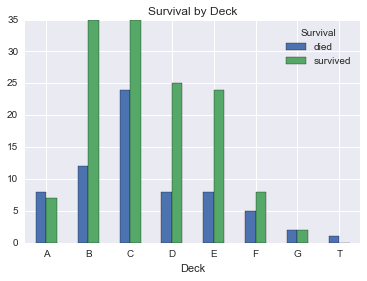

In [202]:
# bar chart showing survival by deck
plot_data(survival_by_deck, 'Survival by Deck', 'Deck')

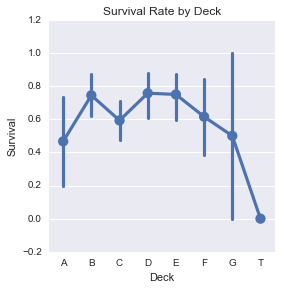

In [211]:
# a handier perspective on the survival rate by deck using a factor plot
factor_plot('Deck', 'Survival', titanic, 'Survival Rate by Deck')

Apart from the Boat Deck explored above and the G Deck, where the number of survivors and non-survivors is equal, the only deck with the survival rate below 50% is A (Promenade Deck), reserved exclusively for the first-class passengers (if Wikipedia is to be believed).

## Family Analysis

Let's move on to analyzing whether the passengers were travelling alone or with some family members and how that influenced their chances of survival.

In [203]:
# definining a new column called Company with two unique values: alone - passenger travelling alone, family - passenger travelling
# with their family members (for the purposes of this analysis, SibSp and Parch columns are both treated as family, regardless
# of the actual relationship)
titanic['Company'] = (titanic.Parch + titanic.SibSp).apply(lambda cnt: 'alone' if cnt == 0 else 'family')

In [204]:
# checking if the transformation worked
titanic.head()

,Survival,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Port,Person,Deck,Company
1,died,third class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male,NaN,family
10,survived,second class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,Cherbourg,child,NaN,family
100,died,second class,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,Southampton,male,NaN,family
101,died,third class,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,Southampton,female,NaN,alone
102,died,third class,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,Southampton,male,NaN,alone


In [205]:
alone_or_not = titanic.Company.value_counts()
print 'Number of people travelling alone is {}'.format(alone_or_not.loc['alone'])
print 'Number of people accompanied by at least one family member is {}'.format(alone_or_not.loc['family'])

Number of people travelling alone is 537
Number of people accompanied by at least one family member is 354


The key takeaway from these figures is that people travelling alone outnumber those accompanied by family members by a factor of 1.5. One would think that if you're travelling alone, you have no relatives to rescue and therefore can put some more effort into saving yourself - in other words, your chances of survival seem to be higher. Let's do a quick visualization to see if that's really the case.

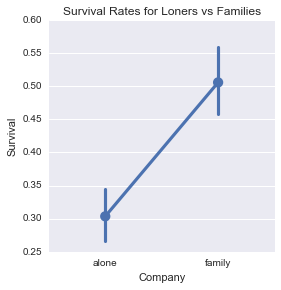

In [206]:
# survival rates for passengers travelling alone and with family members
factor_plot('Company', 'Survival', titanic, 'Survival Rates for Loners vs Families')

In [207]:
group_data(titanic, 'Company', 'Survival')

Survival,died,survived
Company,,
alone,374,163
family,175,179


That's very curious - contrary to what one might expect, people having their family members aboard the Titanic seem almost twice as likely to survive than those travelling alone. And it does make sense once you think about it: people can rely on their family for help in a critical situation, whereas people with no relatives are left to take care of themselves.

Let's dive a bit deeper and take a look at the same factor plot as above, but this time broken down by person type (men, women, children).

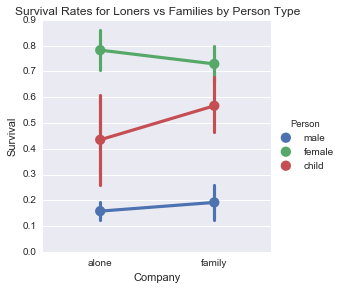

In [208]:
# survival rates for passengers travelling alone and with family members broken down by person type
factor_plot('Company', 'Survival', titanic,
            'Survival Rates for Loners vs Families by Person Type', hue='Person')

Looks like our assumption of family members helping one another out and thus increasing each other's chances of survival holds true for men and children, but female passengers travelling alone seem more likely to survive than those accompanied by their relatives, which might be partly due to the **women and children first** policy mentioned a few times above.

## Conclusions

To reiterate, **based on the available data**, our findings are as follows:

1. Almost two thirds of the passengers were male.
2. Slightly over a half of the passengers were in the third class, with almost 70% of them being male.
3. The third class had twice as many children (defined as anybody under 18) as the first two classes combined.
4. Most passengers were aged between 20 and 35.
5. Over 70% of the passengers boarded the ship in Southampton (port of departure), with 40% of them having third-class tickets.
6. The overall survival rate was 38%.
7. The first class was the only one with the survival rate of over 50%.
8. Survival rate among women was much higher than among men or children (75% vs 17% and 54%, respectively).
9. The deck a passenger was located on didn't seem to have much influence on whether that passenger died or survived.
10. Passengers accompanied by at least one family member tended to be almost twice as likely to survive than those travelling alone.

Item 7 seems to indicate that the first-class passengers were given preferential treatment (regardless of gender) when it came to rescuing people.

Item 8 tends to be in line with the famous policy of **women and children first** - percentwise, much more children and women were saved than men.

Items 9 and 10 were very surprising. One would expect that the closer a deck was to the site of the collision, the fewer chances the passengers located on that deck would have to survive. However, no substantial proof thereof was discovered. Similarly, our initial assumption was that people travelling alone had greater chances of survival since they could dedicate more time and effort to saving themselves rather than their relatives. But the results of the analysis seemed to indicate this assumption was wrong as passengers could presumably rely on their relatives for help in a critical situation.

To be able to make more substantial, forceful, and confident claims, the limitations highlighted in the **Dataset Limitations** subsection need to be removed.